In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px

import folium
from IPython.display import display

from wordcloud import WordCloud,STOPWORDS 

from nltk import bigrams, ngrams
import networkx as nx 
import itertools
import collections

In [219]:
df = pd.read_excel('dashboard_data.xlsx')

In [220]:
def plot_coordinate(value = '11 Cadogan Gardens'):   
    
    fill_color = 'blue'
    color = 'red'
    zoom_start = 13
    search_data = df[df['Hotel_Name'] == value]
    
    lat = search_data.lat.values[0]
    lng = search_data.lng.values[0]
    name = search_data.Hotel_Name.values[0]
    address = search_data.Hotel_Address.values[0]
    
    m = folium.Map(location=[lat,lng], zoom_start=zoom_start)

    folium.CircleMarker(
            [lat, lng],
            radius=10,
            color=color,
            popup='Name: ' + name + '\n\n Address: ' + address,
            fill = True,
            fill_color = fill_color,
            fill_opacity=0.6
        ).add_to(m)
    
    return m

plot_coordinate()

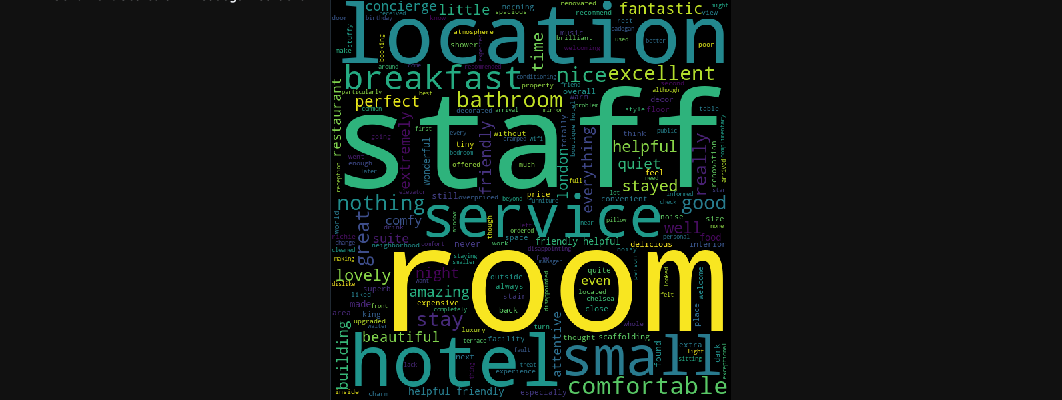

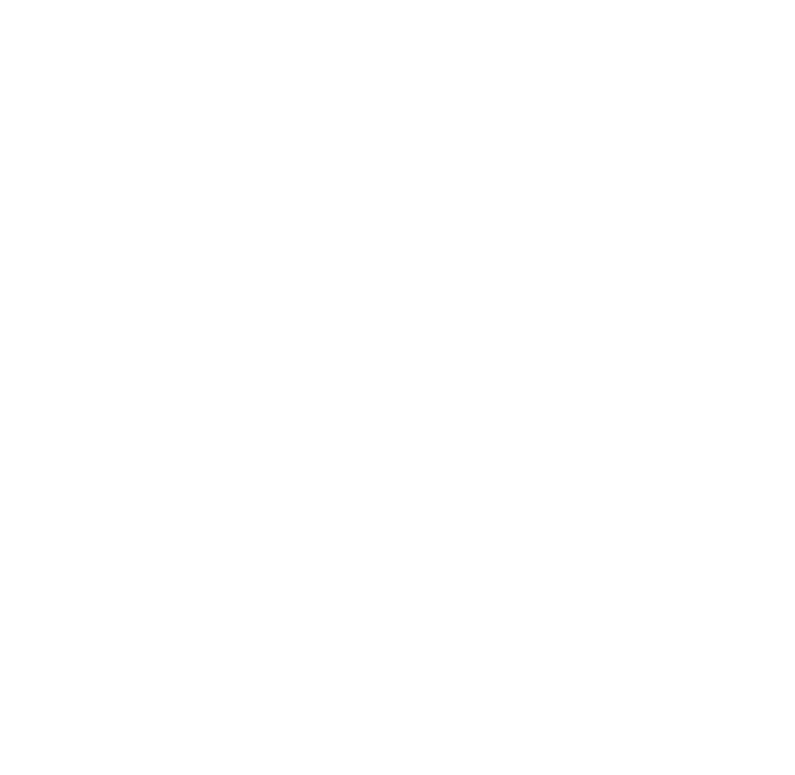

In [292]:
from plotly.tools import mpl_to_plotly


In [222]:
#from IPython.display import display
#display(z)

In [223]:
color = '''aggrnyl     agsunset    blackbody   bluered     blues       blugrn      bluyl       brwnyl
bugn        bupu        burg        burgyl      cividis     darkmint    electric    emrld
gnbu        greens      greys       hot         inferno     jet         magenta     magma
mint        orrd        oranges     oryel       peach       pinkyl      plasma      plotly3
pubu        pubugn      purd        purp        purples     purpor      rainbow     rdbu
rdpu        redor       reds        sunset      sunsetdark  teal        tealgrn     turbo
viridis     ylgn        ylgnbu      ylorbr      ylorrd      algae       amp         deep
dense       gray        haline      ice         matter      solar       speed       tempo
thermal     turbid      armyrose    brbg        earth       fall        geyser      prgn
piyg        picnic      portland    puor        rdgy        rdylbu      rdylgn      spectral
tealrose    temps       tropic      balance     curl        delta       oxy         edge
hsv         icefire     phase       twilight    mrybm       mygbm'''

In [224]:
import plotly.graph_objects as go
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import dash_table
import dash_bootstrap_components as dbc

In [294]:
#----------------- Radar Graph ---------------------#

def sentiment_radar(value = '11 Cadogan Gardens'):
    aspects = ['staff', 'room', 'breakfast', 'service', 'view', 'restaurant', 'bathroom', 'pool']

    search_data = df[df['Hotel_Name'] == value]
    
    data = pd.DataFrame(dict(
        r=search_data[aspects].T.values.flatten(),
        theta=search_data[aspects].T.index))
    fig = px.line_polar(data, r='r', theta='theta', line_close=True)
    
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 10]
        )),
      showlegend=False
    )
    fig.update_layout(title = 'Sentiment Scores of {} '.format(value),
                     title_font_size = 12)
    
    fig.layout.template = 'plotly_dark'
    return fig

def radar_graph():
    return dcc.Graph(id='radar_graph', figure = sentiment_radar('11 Cadogan Gardens'))

#----------------- Address ---------------------#

def get_hotel_name(value = '11 Cadogan Gardens'):
    return value

def hotel_name():
    return html.Div([

    html.Div(id='name', children = get_address('11 Cadogan Gardens'), style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '30px'} )
        
    ])

#----------------- Address ---------------------#

def get_address(value = '11 Cadogan Gardens'):
    search_data = df[df['Hotel_Name'] == value]
    search_data
    return search_data['Hotel_Address'].values[0]

def address():
    return html.Div([

    html.Div(children='''Address: ''', style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '15px',
    }),

    html.Div(id='address', children = get_address('11 Cadogan Gardens'), style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '15px'} )
        
    ])


#----------------- Average Score ---------------------#

def get_average_score(value = '11 Cadogan Gardens'):
    search_data = df[df['Hotel_Name'] == value]
    search_data
    return search_data['Average_Score'].values[0]

def average_score():
    return html.Div([

    html.Div(children='''Rating: ''', style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '15px',
    }),

    html.Div(id='rating', children = get_average_score('11 Cadogan Gardens'), style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '30px'} )
        
    ])

#----------------- Total Number of Reviews ---------------------#

def get_num_review(value = '11 Cadogan Gardens'):
    search_data = df[df['Hotel_Name'] == value]
    search_data
    return search_data['Total_Number_of_Reviews'].values[0]

def num_review():
    return html.Div([

    html.Div(children='''Total Number of Reviews: ''', style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '15px',
    }),

    html.Div(id='num_review', children = get_num_review('11 Cadogan Gardens'), style={
        'textAlign': 'center',
        'color': colors['text'],
        'font-size' : '30px'} )
        
    ])


#----------------- Plot Coordinates ---------------------#

def plot_coordinate(value = '11 Cadogan Gardens'):   
    
    fill_color = 'blue'
    color = 'red'
    zoom_start = 13
    search_data = df[df['Hotel_Name'] == value]
    
    lat = search_data.lat.values[0]
    lng = search_data.lng.values[0]
    name = search_data.Hotel_Name.values[0]
    address = search_data.Hotel_Address.values[0]
    
    m = folium.Map(location=[lat,lng], zoom_start=zoom_start)

    folium.CircleMarker(
            [lat, lng],
            radius=10,
            color=color,
            popup='Name: ' + name + '\n\n Address: ' + address,
            fill = True,
            fill_color = fill_color,
            fill_opacity=0.6
        ).add_to(m)
    
    iframe = m._repr_html_()
    return #m#iframe

def coordinate():
    return dcc.Graph(id='coordinate', figure = plot_coordinate('11 Cadogan Gardens'))

#----------------- Plot Network ---------------------#

# Function to create ngrams (for only 1 topics)
def create_ngrams(text_array, n, aspect):
    terms_ngram = [list(ngrams(w,n)) for w in [text_array]]
    ngram = [i for i in terms_ngram[0] if aspect in i]
    return ngram

#create_ngrams(example, 2, aspect = 'room')

def ngrams_flatten(ngram):
    # Flatten list of bigrams in clean tweets
    ngram = list(itertools.chain(*ngram))
    return ngram

# Function to count the frequency
def ngrams_frequency(ngram,  num_most_common):
    ngram_counts = collections.Counter(ngram)
    ngram_df = pd.DataFrame(ngram_counts.most_common(num_most_common),
                             columns=['ngram', 'count'])
    return ngram_df

#ngrams_frequency(create_ngrams(example, 2, aspect = 'room'), 10)

# Create network plot 

def plot_network(dataframe):
    
    try:
        # transform to dict first
        d = dataframe.set_index('ngram').T.to_dict('records')
        d[0]
        G = nx.Graph()

        # Create connections between nodes
        for k, v in d[0].items():
            G.add_edge(k[0], k[1], weight=(v * 10))

        fig, ax = plt.subplots(figsize=(10, 8))
    
        pos = nx.spring_layout(G, k=2)

        # Plot networks
        nx.draw_networkx(G, pos,
                         font_size=16,
                         width=3,
                         edge_color='grey',
                         node_color='purple',
                         with_labels = False,
                         ax=ax)

        # Create offset labels
        for key, value in pos.items():
            x, y = value[0]+.135, value[1]+.045
            ax.text(x, y,
                    s=key,
                    bbox=dict(facecolor='red', alpha=0.25),
                    horizontalalignment='center', fontsize=13)
    
        plt.show()
        
        fig.layout.template = 'plotly_dark'
        return fig
        
    except:
        return "No Particular Topic"
    
def plotly_network(dataframe, aspect):
    
    try:
        # transform to dict first
        d = dataframe.set_index('ngram').T.to_dict('records')
        d[0]
        G = nx.Graph()
        
        # Create connections between nodes
        for k, v in d[0].items():
            G.add_edge(k[0], k[1], weight=(v * 10))
        
        # Getting positions for each node.
        pos = nx.spring_layout(G, k=0.5, iterations=50)

        # Adding positions of the nodes to the graph
        for n, p in pos.items():
            G.nodes[n]['pos'] = p

        # Adding nodes and edges to the plotly api
        edge_trace = go.Scatter(
            x=[],
            y=[],
            line=dict(width=0.5,color='#888'),
            hoverinfo='none',
            mode='lines')

        for edge in G.edges():
            x0, y0 = G.nodes[edge[0]]['pos']
            x1, y1 = G.nodes[edge[1]]['pos']
            edge_trace['x'] += tuple([x0, x1, None])
            edge_trace['y'] += tuple([y0, y1, None])

        node_trace = go.Scatter(
            x=[],
            y=[],
            text=[],
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=True,
                colorscale='inferno',
                reversescale=True,
                color=[],
                size=7,
                colorbar=dict(
                    thickness=10,
                    title='Node Connections',
                    xanchor='left',
                    titleside='right'
                ),
                line=dict(width=0)))

        for node in G.nodes():
            x, y = G.nodes[node]['pos']
            node_trace['x'] += tuple([x])
            node_trace['y'] += tuple([y])

        # Coloring based on the number of connections of each node
        for node, adjacencies in enumerate(G.adjacency()):
            node_trace['marker']['color']+=tuple([len(adjacencies[1])])
            node_info = adjacencies[0] +' # of connections: '+str(len(adjacencies[1]))
            node_trace['text']+=tuple([node_info])  

        # Plotting the figure
        fig = go.Figure(data=[edge_trace, node_trace],
                        #text = node_trace['text'],
                     layout=go.Layout(
                        title='<br>Words Correlation of {}'.format(aspect.capitalize()),
                        titlefont=dict(size=12),
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        #annotations=[ dict(
                        #    text="No. of connections",
                        #    showarrow=False,
                        #    xref="paper", yref="paper") ],
                        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

        fig.add_trace(go.Scatter(
            x=node_trace['x'],
            y=node_trace['y'],
            mode="text",
            name="Lines and Text",
            text=[i.split()[0] for i in node_trace['text']],
            textposition="top center",
        ))
        
        fig.layout.template = 'plotly_dark'
        
        return fig
    
    except:
        return "No Particular Topic"

    
aspects = ['staff', 'room', 'breakfast', 'service', 'view', 'restaurant', 'bathroom', 'pool']

def word_correlation_plot(value = '11 Cadogan Gardens', aspect = 'staff', ngrams = 3, size = 30):

    search_data = df[df['Hotel_Name'] == value]
    search_data
    
    return plotly_network(ngrams_frequency(create_ngrams(search_data['Review'].values[0].split(), ngrams, aspect = aspect), size), aspect)

def word_correlation():
    return dcc.Graph(id='word_correlation', figure = word_correlation_plot('11 Cadogan Gardens', 'staff'))

#----------------- WordCloud Draw ---------------------#

def wordcloud_draw(value = '11 Cadogan Gardens'):
    
    search_data = df[df['Hotel_Name'] == value]
    color = 'black'
    words = search_data['Review'].values[0]
    #cleaned_word = " ".join([word for word in words.split()
    #                        if 'http' not in word
    #                            and not word.startswith('@')
    #                            and not word.startswith('#')
    #                            and word != 'RT'
    #                        ])
    wordcloud = WordCloud(#stopwords=STOPWORDS,
                      background_color=color,
                      width=600,
                      height=600
                     ).generate(words)
    plt.figure(1,figsize=(14, 14))
    
    fig = px.imshow(wordcloud, width=400, height=400)
    #fig.update_layout(coloraxis_showscale=False)
    fig.update_xaxes(showticklabels=False)
    fig.update_yaxes(showticklabels=False)
    plt.axis('off')
    fig.layout.template = 'plotly_dark'
    
    fig.update_layout(title = 'Sentiment Scores of {} '.format(value),
                     title_font_size = 12)
    fig.update_layout(
    margin=dict(l=0, r=0, t=0, b=0),
    )
    return fig
    
def wordcloud_rend():
    return dcc.Graph(id='wordcloud', figure = wordcloud_draw('11 Cadogan Gardens'))

In [ ]:
app = dash.Dash()


aspects = ['staff', 'room', 'breakfast', 'service', 'view', 'restaurant', 'bathroom', 'pool']
colors = {
    'background': '#111111',
    'text': '#7FDBFF'
}

dropdownlist = [{'label': i, 'value': i} for i in df['Hotel_Name']]
aspectsdropdownlist = [{'label': i, 'value': i} for i in aspects ]

app.layout = html.Div(style={'backgroundColor': colors['background']}, 
         
    children=[
        html.H1(
            children='Europe Hotel Reviews',
            style={
                'textAlign': 'center',
                'color': colors['text']
            }
        ),

        html.Div(children='''This is the results of sentiment analysis through the reviews about 
        Hotels in Europe based on certain aspects.''', 
                 style={'textAlign': 'center',
                        'color': colors['text']
                }
        ),

        html.Br(),

        html.Div(children='''Project by Ariqleesta (LBB Algoritma).''', style={
            'textAlign': 'center',
            'color': colors['text'],
            'font-size' : '12px',
        }),

        html.Br(),
        
        
        
        

        html.Div(style={'backgroundColor': colors['background'],
                       }, children = [
            
            html.Div(dcc.Dropdown(id='dropdown',
                     options=dropdownlist,
                     value='11 Cadogan Gardens'),style = {}),
            
            html.Br(),
            html.Div(dcc.Dropdown(id='aspect_dropdown',
                 options= aspectsdropdownlist,
                 value='staff'),style = {})
        ]),
        html.Br(),
        
        
        html.Div(style={'backgroundColor': colors['background'],
                       },
            children = [
            html.Div([
                hotel_name(),
                
                html.Br(),
                html.Div(address()),
                
                html.Br(),
                html.Br(),
                html.Br(),
                html.Br(),
                           
            ],style = { 'width': '85%',
                        'float':'left',
                        'display': 'inline-block',
                        'backgroundColor': colors['background'],
                                    }),
                      
                      
                      
    
            html.Div([

            html.Br(),


            html.Div(average_score()),

            html.Br(),

            html.Div(num_review()),

            html.Br(),], style = {'width': '15%',
                                  'float':'right',
                                  'display': 'inline-block',
                                  'backgroundColor': colors['background'],
                                      
                                    })
                     ]),

        
        
        html.Div(style={'backgroundColor': colors['background'],
                       }, children = [
            html.Div(radar_graph(),style = 
                                  {
                                    'width': '40%',
                                    'float':'left',
                                    'display': 'inline-block',
                                    
                                    }),
                                
                                
            html.Div(children = word_correlation(),style = 
                                 {
                                     'width': '60%',
                                     'float': 'right',
                                     'display': 'inline-block',
                                     
                                 }),
            
        ]),
        
        
        #------ Word Cloud --------#
        html.Div(children='''Word Cloud''', 
                 style={'textAlign': 'left',
                        'color': colors['text'],
                        'font-size': '30px'
                }
        ),
        
        html.Br(),

        html.Div(wordcloud_rend(),style = 
                                  {
                                    'width': '40%',
                                    #'float':'center',
                                    'display': 'inline-block',
                                    
                                    }),
        
    

])

@app.callback(
    Output('radar_graph', 'figure'),
    [Input('dropdown', 'value')])

def update_figure(value):
    
    return sentiment_radar(value)

@app.callback(
    Output('name', 'children'),
    [Input('dropdown', 'value')])

def update_name(value):
    
    return get_hotel_name(value)


@app.callback(
    Output('address', 'children'),
    [Input('dropdown', 'value')])

def update_address(value):
    
    return get_address(value)

@app.callback(
    Output('rating', 'children'),
    [Input('dropdown', 'value')])

def update_rating(value):
    
    return get_average_score(value)

@app.callback(
    Output('num_review', 'children'),
    [Input('dropdown', 'value')])

def update_num_review(value):
    
    return get_num_review(value)

@app.callback(
    Output('word_correlation', 'figure'),
    [Input('dropdown', 'value'), Input('aspect_dropdown', 'value')])

def update_word_correlation(value1, value2):
    
    return word_correlation_plot(value1, value2)

@app.callback(
    Output('wordcloud', 'figure'),
    [Input('dropdown', 'value')])

def update_word_correlation(value):
    
    return wordcloud_draw(value)

if __name__ == '__main__':
    app.run_server(host = "127.0.0.1", port = 8080,)

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is running on http://127.0.0.1:8080/

Dash is run

 * Running on http://127.0.0.1:8080/ (Press CTRL+C to quit)
127.0.0.1 - - [01/Mar/2021 16:01:57] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [01/Mar/2021 16:01:58] "POST /_dash-update-component HTTP/1.1" 200 -
